In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import tensorflow as tf

import h5py

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, Reshape, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
def feature_normalize(dataset):

    mu = np.mean(dataset)
    sigma = np.std(dataset)
    
    return (dataset - mu) / sigma

In [4]:
def get_class_data(class_name):
    global class_counts
    
    path = os.path.join(train_path, class_name)
    class_units = np.fromfile(path, dtype=int, count=-1, sep=' ', offset=0)
    units = np.array_split(class_units, class_units.size // 1080, 0) # 1080 = 3 sec * 360Hz
    class_counts[class_name] = class_units.size // 1080
   
    return units

In [23]:
base_path = 'C:\\Users\\Professional\\Desktop\\1studing\\CourseWork3\\course_work_app\\Course_work\\cnn_code_4_classes'
model_save_path = os.path.join(base_path, 'model\\cnn_model.h5') 
model_weights_path = os.path.join(base_path, 'model\\cnn_model_weights.hdf5')
train_path = os.path.join(base_path, 'data_files_train_4')

classes = ['N', 'RBBB', 'B', 'AFIB']
class_mapping = {'N': 0, 'RBBB': 1, 'B': 2, 'AFIB': 3}
class_counts = {'N': 0, 'RBBB': 0, 'B': 0, 'AFIB': 0}

X_train = [] # data - each unit 3 sec - 1080 values
Y_train = [] #labels - from class_mapping
XXXX = []
YYYY = []

for class_i in classes:
    class_units = get_class_data(class_i)
    Y_train  += [class_mapping[class_i]] * class_counts[class_i]
    X_train += class_units

    XX_temp = []
    XX_temp = np.asarray(X_train)
    YY_temp = []
    YY_temp = np.asarray(Y_train)

    XXX_temp = []
    YYY_temp = []
    XXX_temp = np.array(XXX_temp)
    YYY_temp = np.array(YYY_temp)

    if class_i == 'N':
        XXX_temp = XX_temp[:-2]
        YYY_temp = YY_temp[:-2]
    else:
        XXX_temp = XX_temp
        YYY_temp = YY_temp
    X_temp = []
    X_temp = XXX_temp.tolist()
    XXXX += X_temp
    Y_temp = []
    Y_temp = YYY_temp.tolist()
    YYYY += Y_temp

XXXX = np.asarray(XXXX) 
YYYY = np.asarray(YYYY)
XX_train = XXXX.astype("float32")
YY_train = YYYY.astype("float32")

#print(len(XX_train)) # 5435
#print(len(YY_train)) 

XXX_train = feature_normalize(XX_train)
YYY_train = to_categorical(YY_train, 4)

In [24]:
TIME_PERIODS = 1080

num_classes = 4
input_shape = None

model = Sequential()
model.add(Reshape((TIME_PERIODS, 1), input_shape=(input_shape,)))  
model.add(Conv1D(64, 10, activation='relu', input_shape=(TIME_PERIODS, 1)))
model.add(Conv1D(64, 10, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(64, 10, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

print(model.summary())

model.save(model_save_path)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 1080, 1)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 1071, 64)          704       
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 1062, 64)          41024     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 354, 64)           0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 345, 64)           41024     
_________________________________________________________________
flatten_3 (Flatten)          (None, 22080)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               


--- Fit the model ---

Train on 5435 samples
Epoch 1/5
5435/5435 [==============================] - 94s 17ms/sample - loss: 0.6777 - accuracy: 0.7301
Epoch 2/5
5435/5435 [==============================] - 83s 15ms/sample - loss: 0.3560 - accuracy: 0.8620
Epoch 3/5
5435/5435 [==============================] - 83s 15ms/sample - loss: 0.2198 - accuracy: 0.9192
Epoch 4/5
5435/5435 [==============================] - 83s 15ms/sample - loss: 0.1619 - accuracy: 0.9371
Epoch 5/5
5435/5435 [==============================] - 82s 15ms/sample - loss: 0.1324 - accuracy: 0.9514

--- Learning curve of model training ---



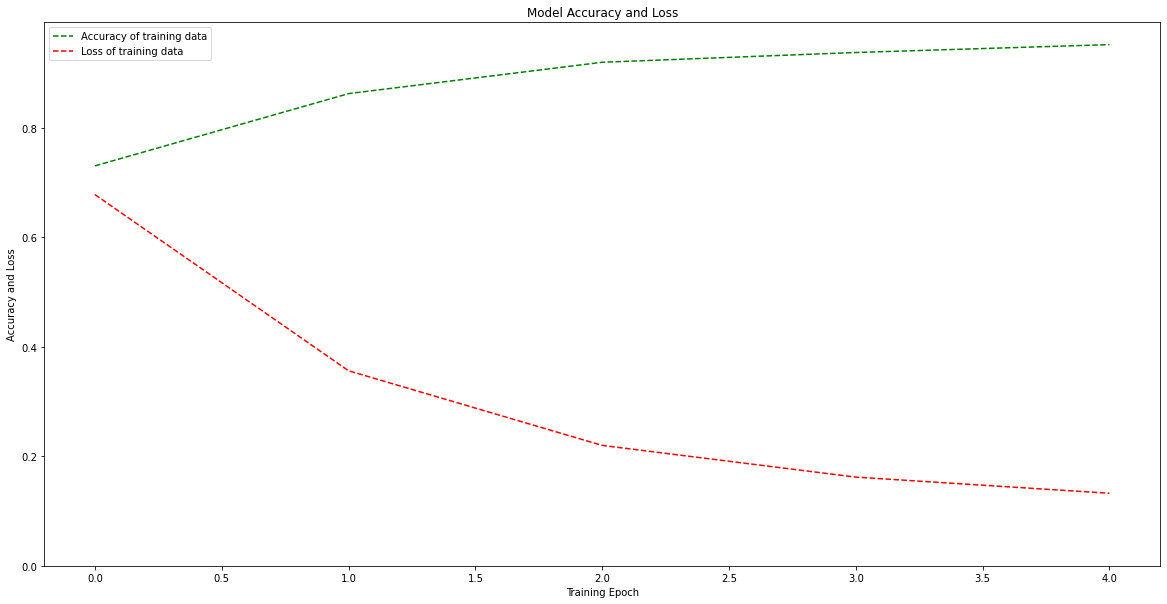

In [25]:
print("\n--- Fit the model ---\n")

# Hyper-parameters
BATCH_SIZE = 32
EPOCHS = 5

history = model.fit(XXX_train,
                      YYY_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      verbose=1)  

model.save_weights(model_weights_path)


print("\n--- Learning curve of model training ---\n")

# summarize history for accuracy and loss
plt.figure(figsize=(20, 10)) 
plt.plot(history.history['accuracy'], "g--", label="Accuracy of training data")
plt.plot(history.history['loss'], "r--", label="Loss of training data")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()